1.  Опишите,  как  производится  коррекция  яркости  и  цвета  в  цифровых 
изображениях. Какие методы можно использовать для этого? Приведите пример, 
когда коррекция яркости может значительно улучшить качество изображения в 
задачах компьютерного зрения. 
2.  Используйте  TensorFlow  или  PyTorch  для  создания  и  обучения  свёрточной 
нейросети на датасете CIFAR-10.

| Метод обработки                     | Описание |
|--------------------------------------|----------|
| **Линейное преобразование**         | Изменение яркости и контраста путем умножения и смещения значений пикселей. |
| **Гамма-коррекция**                 | Нелинейное изменение яркости для улучшения детализации в темных или светлых областях. |
| **Гистограммное выравнивание**       | Перераспределение яркости для увеличения контраста. |
| **Адаптивное гистограммное выравнивание (CLAHE)** | Локальная коррекция контраста для изображений с неравномерным освещением. |
| **Цветовая коррекция**               | Исправление цветовых искажений, баланс белого. |
| **Фильтры (например, Bilateral, Unsharp Masking)** | Улучшение контраста и яркости с сохранением деталей. |

Примеры:
1. Линейная коррекция - когда диапазон слишком "узкий", светлые и темные места мало отличаются
2. Нелинейная коррекция - когда диапазон слишком "широкий", есть пересвет а тени почти черные ("сужаем" диапазон) 


Базовая архитекетура которую буду использовать
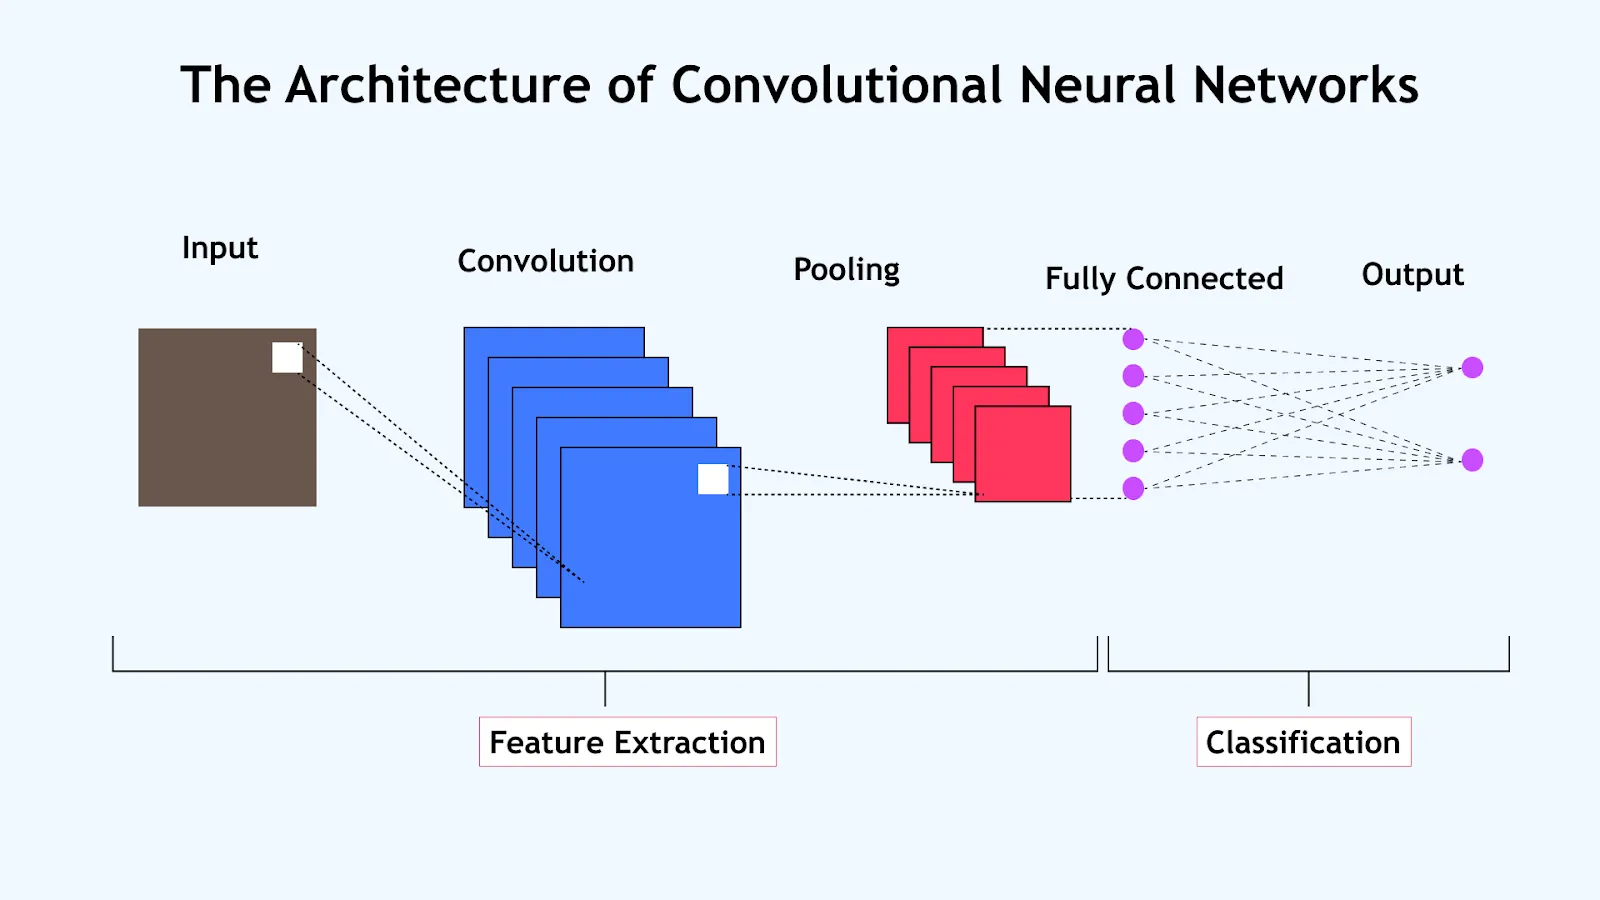

/Users/tima/Downloads/Билеты_Методы_обработки_и_распознавания_изображений/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/Users/tima/Downloads/Билеты_Методы_обработки_и_распознавания_изображений/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3952 - loss: 1.6699 - val_accuracy: 0.5465 - val_loss: 1.2650
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5907 - loss: 1.1506 - val_accuracy: 0.5824 - val_loss: 1.1770
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6483 - loss: 1.0044 - val_accuracy: 0.6147 - val_loss: 1.0800
313/313 - 1s - 3ms/step - accuracy: 0.6147 - loss: 1.0800
Test Accuracy: 0.6147


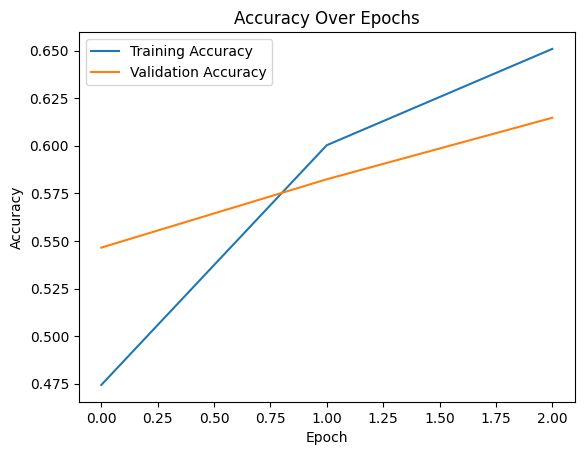

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=3, 
    validation_data=(X_test, y_test)
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

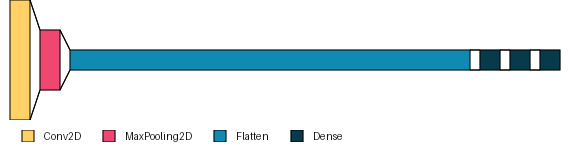

In [12]:
import visualkeras

visualkeras.layered_view(model, legend=True, draw_volume=False)